In [19]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [20]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1            
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext        
        
        print('{} - {} / {}'.format(counter, round(data[y_symbol][0], 2), round(data[x_symbol][0], 2)))
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [21]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [22]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-10-14
data: (363, 75)
pairs: (2069, 12)


In [23]:
#data.to_excel('datasets/data_cart.xlsx')

In [24]:
#pairs

In [25]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 10) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,CSNA3,USIM5,-4.218576,99,0.912734,2.006251,2,Short/Long,0.664468,9,"100,120,140,160,180,200,220,240,250"
1,100,ELET6,VVAR3,-4.212216,99,1.309550,2.047709,2,Long/Short,0.336006,9,"100,120,140,160,180,200,220,240,250"
2,100,GGBR4,IRBR3,-4.741399,99,0.208403,2.007948,2,Long/Short,0.220024,9,"100,120,140,160,180,200,220,240,250"
3,100,GOAU4,IRBR3,-4.571883,99,0.121308,2.346290,2,Long/Short,0.215756,9,"100,120,140,160,180,200,220,240,250"
4,100,VIVT4,VVAR3,-4.864681,99,0.811702,2.243774,2,Long/Short,0.324249,9,"100,120,140,160,180,200,220,240,250"
5,100,IRBR3,SANB11,-3.759044,99,0.547486,2.379790,3,Short/Long,0.249451,9,"100,120,140,160,180,200,220,240,250"
6,100,RADL3,SBSP3,-4.173587,99,0.073566,2.333648,3,Short/Long,0.323613,9,"100,120,140,160,180,200,220,240,250"
7,100,RADL3,SULA11,-4.150617,99,0.128538,2.498859,3,Short/Long,0.402978,9,"100,120,140,160,180,200,220,240,250"
8,100,RADL3,VVAR3,-3.798623,99,0.149332,2.174213,3,Short/Long,0.224796,9,"100,120,140,160,180,200,220,240,250"
9,100,VIVT4,WEGE3,-3.810054,99,0.296191,2.358585,3,Long/Short,0.283919,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [26]:
#plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [27]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [28]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [29]:
#new pairs 0,1,8
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,CSNA3,USIM5,-4.218576,99,0.912734,2.006251,2,Short/Long,0.664468,9,"100,120,140,160,180,200,220,240,250"
1,100,IRBR3,SANB11,-3.759044,99,0.547486,2.379790,3,Short/Long,0.249451,9,"100,120,140,160,180,200,220,240,250"
2,100,RADL3,VVAR3,-3.798623,99,0.149332,2.174213,3,Short/Long,0.224796,9,"100,120,140,160,180,200,220,240,250"
3,100,PETR3,VALE3,-4.369692,99,0.416766,2.123380,2,Long/Short,0.541212,9,"100,120,140,160,180,200,220,240,250"


In [30]:
"""new = pairs_signal.iloc[[0,5,8]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
#oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[0,5,8]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\n#oper.to_csv('datasets/operations.csv', index=False)\noper"

In [31]:
#oper.to_csv('datasets/operations.csv', index=False)

In [32]:
check_coint(oper, data)

CSNA3/USIM5, 100, True, 99
IRBR3/SANB11, 100, True, 90
RADL3/VVAR3, 100, True, 99
PETR3/VALE3, 100, True, 95


0 - 18.4 / 10.23


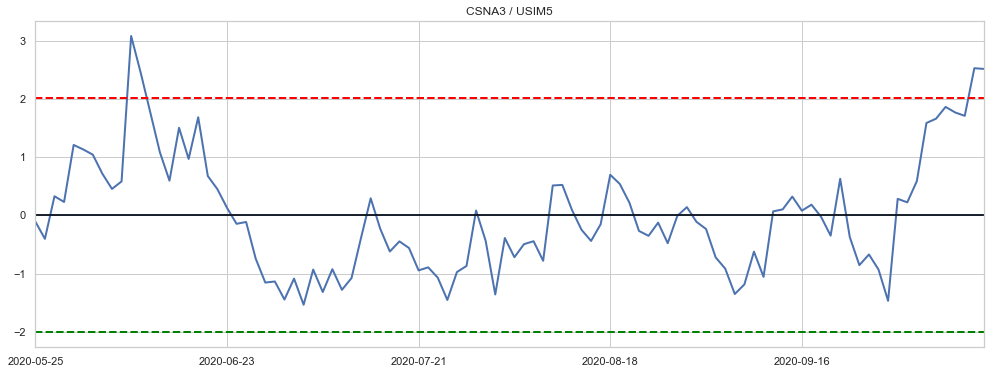

1 - 7.16 / 32.17


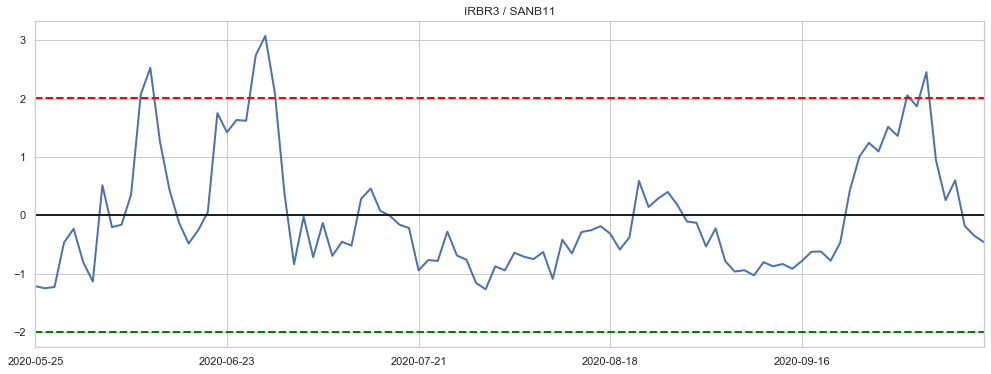

2 - 26.39 / 19.27


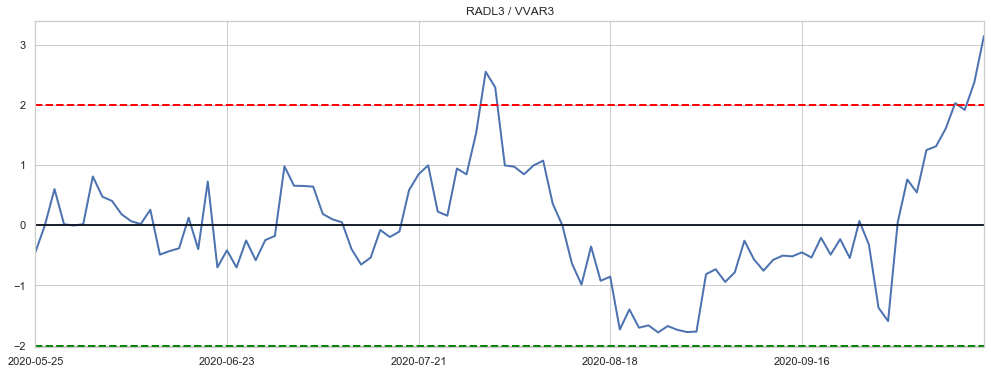

3 - 20.01 / 63.0


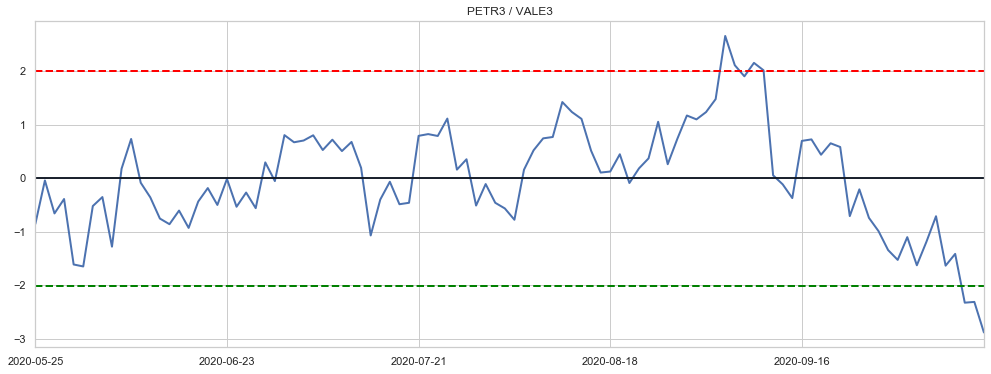

In [33]:
plot_pairs(oper, data)

In [34]:
#df.to_excel('datasets/data_cart.xlsx')

In [35]:
parameters_input_cash_neutral(oper, data)

Short: CSNA3 (18.4) 100 <-> Long: USIM5 (10.23) 100
Short: IRBR3 (7.16) 400 <-> Long: SANB11 (32.17) 100
Short: RADL3 (26.39) 100 <-> Long: VVAR3 (19.27) 100
Long: PETR3 (20.01) 100 <-> Short: VALE3 (63.0) 100


In [36]:
"""
Short: CSNA3 (16.54) 100 <-> Long: USIM5 (10.07) 100
Short: IRBR3 (8.1) 300 <-> Long: SANB11 (27.9) 100
Short: RADL3 (24.09) 100 <-> Long: VVAR3 (17.87) 100
"""

'\nShort: CSNA3 (16.54) 100 <-> Long: USIM5 (10.07) 100\nShort: IRBR3 (8.1) 300 <-> Long: SANB11 (27.9) 100\nShort: RADL3 (24.09) 100 <-> Long: VVAR3 (17.87) 100\n'